# Support Vector Machine (SVM)

## SVM Model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state)

### Step - 1: Loading Different Libraries

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

#### About Data

|Field Name|Description|
|--- |--- |
|ID|Identifier|
|Clump|Clump Thickness|
|UnifSize|Uniformity of Cell Size|
|UnifShape|Uniformity of Cell Shape|
|MargAdh|Marginal Adhesion|
|SingEpiSize|Single Epithelial Cell Size|
|BareNuc|Bare Nuclei|
|BlandChrom|Bland Chromatin|
|NormNucl|Normal Nucleoli|
|Mit|Mitoses|
|Class|Benign or Malignant|

Original Author - UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepositor...] 

### Step - 2: Loading Data

In [2]:
cell_df = pd.read_csv('Data for SVM.csv')

In [3]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cell_df.describe(include = 'all')

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

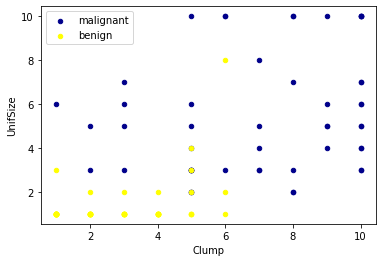

In [8]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

### Step - 3: Data Preprocessing and Selection

In [6]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
# It looks like the BareNuc column includes some values that are not numerical and drop those rows.
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [9]:
# Selection of Input data or Independent variables
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [10]:
# Selection of Output data or Dependent variable
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

### Step - 4: Train-Test-Split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


### Step - 5: Modelling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

#### Step - 5(A): Using Radial Basis Function (RBF) Kernel

In [13]:
from sklearn import svm
# Kernel used is Radial Basis Function (RBF)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [14]:
# Predict new values
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

### Step - 6: Evaluation

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Get the Confusion Matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)
cnf_matrix

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [19]:
# Evaluation of Confusion Matrix:
# 85 means Predicted Value is Benign, and True Value is Benign (True Positive)
# 5 means Predicted Value is Malignant, and True Value is Benign (Flase Positive)
# 0 means Predicted Value is Benign, and True Value is Malignant (True Negative)
# 47 means Predicted Value is Malignant, and True Value is Malignant (True Negative)

In [21]:
# Get the Classification Report
cnf_report = classification_report(y_test, yhat)
print(cnf_report)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [23]:
# Get the accuracy of model of 0.96 using Radial Basis Function

In [22]:
# Get the index of Accuracy using Jcard Score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=2)

0.9444444444444444

#### Step - 5(B): Using Linear Kernel

In [24]:
clf_l = svm.SVC(kernel='linear')
clf_l.fit(X_train, y_train) 

SVC(kernel='linear')

In [25]:
yhat_l = clf_l.predict(X_test)
yhat_l [0:5]

array([2, 4, 2, 4, 2])

In [29]:
cnf_matrix_l = confusion_matrix(y_test, yhat_l, labels=[2,4])
np.set_printoptions(precision=2)
cnf_matrix_l

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [30]:
cnf_report_l = classification_report(y_test, yhat_l)
print(cnf_report_l)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [31]:
jaccard_score(y_test, yhat_l, pos_label=2)

0.9444444444444444

#### Step - 5(C): Using Polynomial Kernel

In [32]:
clf_p = svm.SVC(kernel='poly')
clf_p.fit(X_train, y_train) 

SVC(kernel='poly')

In [33]:
yhat_p = clf_p.predict(X_test)
yhat_p [0:5]

array([2, 4, 2, 4, 2])

In [34]:
cnf_matrix_p = confusion_matrix(y_test, yhat_p, labels=[2,4])
np.set_printoptions(precision=2)
cnf_matrix_p

array([[86,  4],
       [ 0, 47]], dtype=int64)

In [35]:
cnf_report_p = classification_report(y_test, yhat_p)
print(cnf_report_p)

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



In [36]:
jaccard_score(y_test, yhat_p, pos_label=2)

0.9555555555555556

#### Step - 5(D): Using Sigmoid Kernel

In [39]:
clf_s = svm.SVC(kernel='sigmoid')
clf_s.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [40]:
yhat_s = clf_s.predict(X_test)
yhat_s [0:5]

array([2, 2, 2, 2, 2])

In [44]:
cnf_matrix_s = confusion_matrix(y_test, yhat_s, labels=[2,4])
np.set_printoptions(precision=2)
cnf_matrix_s

array([[54, 36],
       [47,  0]], dtype=int64)

In [42]:
cnf_report_s = classification_report(y_test, yhat_s)
print(cnf_report_s)

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137



In [45]:
jaccard_score(y_test, yhat_s, pos_label=2)

0.39416058394160586

In [46]:
# It is observed that with Polynomial Kernel, the best accuracy is achieved.